# Introduction to pyMOR

## What is pyMOR?

* #### A software library for building model order reduction applications with *Python*
* #### Free and open source

## How did pyMOR start?

* #### Project started in October 2012
* #### Founding members were based at the University of Münster, Germany
* #### Started off as a library for applying the reduced-basis method
* #### Original motivation: Decouple MOR algorithms from large-scale models
    * #### Proprietary code for battery simulation models could not be shared with MOR experts
    * #### Can we still do model reduction without access to the model?

<table width=70%>
    <tr>
        <td><img src="figs/renefritze.jpg"></td>
        <td><img src="figs/sdrave.jpg"></td>
        <td><img src="figs/ftschindler.jpg"></td>
    </tr>
    <tr>
        <td>René Fritze</td>
        <td>Stephan Rave</td>
        <td>Felix Schindler</td>
    </tr>
</table>
<br>




## Where is pyMOR now?

* #### Over 40 people have contributed, with 5 designated main developers
* #### Over 25k lines of code
* #### Annual pyMOR school events with lectures and project support
* #### Linear algebra and MOR algorithms from various research communities:
    * #### Randomized linear algebra (SVD, eigenvalue solvers, ...)
    * #### Balanced Truncation
    * #### IRKA
    * #### AAA/Loewner
    * #### Reduced basis method (RBM)
    * #### POD
    * #### ...

<table width=70%>
    <tr>
        <td><img src="figs/pmli.jpg"></td>
        <td><img src="figs/HenKlei.jpg"></td>
        <td><img src="figs/sdrave.jpg"></td>
        <td><img src="figs/ftschindler.jpg"></td>
        <td><img src="figs/lbalicki.jpg"></td>
    </tr>
    <tr>
        <td>Petar Mlinarić</td>
        <td>Hendrik Kleikamp</td>
        <td>Stephan Rave</td>
        <td>Felix Schindler</td>
        <td>Linus Balicki</td>
    </tr>
</table>
<br>
<br>
<br>

## Imports and Settings

In [4]:
import numpy as np
import scipy.linalg as spla
import matplotlib.pyplot as plt
from pymor.core.logger import set_log_levels

plt.rcParams['axes.grid'] = True
set_log_levels({
    'pymor.algorithms.gram_schmidt.gram_schmidt': 'WARNING',
    'pymor.reductors.basic.LTIPGReductor': 'WARNING',
})

## LTI Models in pyMOR

#### How do we create a basic LTI model?

   $$\dot{\mathbf{x}}(t) &= \mathbf{A} \mathbf{x}(t) + \mathbf{B} u(t) \\ y(t) &= \mathbf{C} \mathbf{x}(t)$$

In [9]:
from pymor.models.iosys import LTIModel

A = np.random.rand(10,10)
B = np.random.rand(10,1)
C = np.random.rand(1,10)

lti = LTIModel.from_matrices(A,B,C)

In [10]:
lti

LTIModel(
    NumpyMatrixOperator(<10x10 dense>),
    NumpyMatrixOperator(<10x1 dense>),
    NumpyMatrixOperator(<1x10 dense>),
    D=ZeroOperator(NumpyVectorSpace(1), NumpyVectorSpace(1)),
    E=IdentityOperator(NumpyVectorSpace(10)),
    presets={})

In [24]:
lti.A

NumpyMatrixOperator(<10x10 dense>)

#### What are these NumpyMatrixOperators?

* #### pyMOR supports various Operators which can handle many different things
    * #### "Black-box" evaluations coupled to an external PDE solver
    * #### Structured matrices (banded, block, Hankel, ...)
    * #### Nonlinear operators (e.g. quadratic $\mathbf{N} (\mathbf{x}(t) \otimes \mathbf{x}(t)$)
    * #### Simply a numpy matrix &#8594; NumpyMatrixOperator
* #### Operators allow for decoupling the MOR algorithms from the linear algebra backend of the large-scale model

In [25]:
lti.A.matrix

array([[0.95480997, 0.07707383, 0.86176506, 0.92435771, 0.72085876,
        0.35600605, 0.27595493, 0.96243672, 0.11622637, 0.04385411],
       [0.1874285 , 0.86117909, 0.21012529, 0.61057416, 0.41876273,
        0.60376227, 0.5873981 , 0.16887525, 0.78403582, 0.51636734],
       [0.39259267, 0.10897101, 0.31067451, 0.05731657, 0.93085393,
        0.31726071, 0.06294307, 0.12288758, 0.50418827, 0.62124161],
       [0.26219091, 0.92063545, 0.68167379, 0.73287112, 0.68791033,
        0.41713429, 0.28526639, 0.63598183, 0.70536382, 0.88988411],
       [0.55491107, 0.03299026, 0.33333292, 0.09165311, 0.72782833,
        0.30000261, 0.24733009, 0.49161738, 0.25981858, 0.37066483],
       [0.63530764, 0.7340467 , 0.25882545, 0.7975928 , 0.81274198,
        0.21329128, 0.84204085, 0.07260254, 0.64643519, 0.81021714],
       [0.04514279, 0.1452619 , 0.5869773 , 0.83782504, 0.0283639 ,
        0.415775  , 0.90374722, 0.33617104, 0.19439729, 0.73734984],
       [0.8828684 , 0.27829635, 0.1195435

In [26]:
print(lti)

LTIModel
    class: LTIModel
    number of equations: 10
    number of inputs:    1
    number of outputs:   1
    continuous-time
    linear time-invariant
    solution_space:  NumpyVectorSpace(10)


## Rail Model

In [1]:
from pymor.models.iosys import LTIModel

rail_fom = LTIModel.from_abcde_files('data/rail/rail_5177_c60')

00:04 load_matrix: Loading matrix from file data/rail/rail_5177_c60.A
00:04 |WARNING|load_matrix: Could not detect file format. Trying all loaders ...
00:04 load_matrix: Loading matrix from file data/rail/rail_5177_c60.B
00:04 |WARNING|load_matrix: Could not detect file format. Trying all loaders ...
00:04 load_matrix: Loading matrix from file data/rail/rail_5177_c60.C
00:04 |WARNING|load_matrix: Could not detect file format. Trying all loaders ...
00:04 load_matrix: Loading matrix from file data/rail/rail_5177_c60.E
00:04 |WARNING|load_matrix: Could not detect file format. Trying all loaders ...


In [2]:
rail_fom

LTIModel(
    NumpyMatrixOperator(<5177x5177 sparse, 35185 nnz>),
    NumpyMatrixOperator(<5177x7 sparse, 345 nnz>),
    NumpyMatrixOperator(<6x5177 sparse, 17 nnz>),
    D=ZeroOperator(NumpyVectorSpace(6), NumpyVectorSpace(7)),
    E=NumpyMatrixOperator(<5177x5177 sparse, 35241 nnz>),
    presets={})

In [14]:
rail_fom.A

NumpyMatrixOperator(<5177x5177 sparse, 35185 nnz>)

In [15]:
rail_fom.A.matrix

<5177x5177 sparse matrix of type '<class 'numpy.float64'>'
	with 35185 stored elements in Compressed Sparse Column format>

In [16]:
print(rail_fom)

LTIModel
    class: LTIModel
    number of equations: 5177
    number of inputs:    7
    number of outputs:   6
    continuous-time
    linear time-invariant
    solution_space:  NumpyVectorSpace(5177)


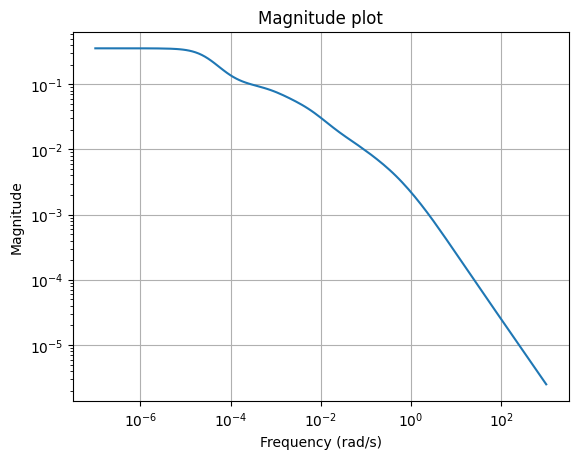

In [17]:
w = (1e-7, 1e3)
_ = rail_fom.transfer_function.mag_plot(w)

## Hankel Singular Values

Accordion(children=(HTML(value='', layout=Layout(height='16em', width='100%')),), titles=('Log Output',))

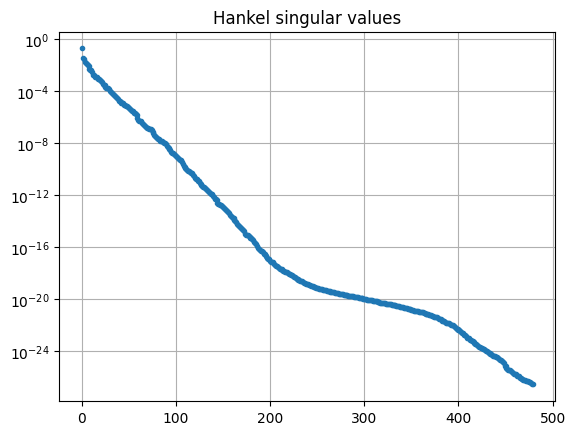

In [18]:
rail_hsv = rail_fom.hsv()

# %% slideshow={"slide_type": "fragment"}
fig, ax = plt.subplots()
_ = ax.semilogy(rail_hsv, '.')
_ = ax.set_title('Hankel singular values')

## Balanced Truncation

In [19]:
from pymor.reductors.bt import BTReductor

rail_bt = BTReductor(rail_fom)

rail_rom_bt = rail_bt.reduce(20)

rail_rom_bt

LTIModel(
    NumpyMatrixOperator(<20x20 dense>),
    NumpyMatrixOperator(<20x7 dense>),
    NumpyMatrixOperator(<6x20 dense>),
    D=ZeroOperator(NumpyVectorSpace(6), NumpyVectorSpace(7)),
    E=NumpyMatrixOperator(<20x20 dense>),
    presets={},
    name='LTIModel_reduced')

In [20]:
rail_rom_bt.A.matrix

array([[-2.28647595e-09, -1.27375374e-09,  8.76229378e-10,
         1.66113710e-08,  2.83558689e-08, -2.48227397e-11,
         2.93250149e-08,  5.87840544e-10,  3.43898626e-09,
        -3.61766837e-09, -6.60029671e-10,  1.94795374e-09,
         9.15152448e-09,  2.99619594e-09, -2.43934087e-11,
        -9.70769749e-10, -5.36911880e-09, -7.49850685e-09,
         6.84868135e-10, -4.58724114e-09],
       [ 1.65424631e-10, -1.66294123e-08, -5.16063674e-08,
        -1.62359912e-08,  1.86324007e-08,  4.15416961e-08,
         6.88615645e-09,  1.31880278e-09, -2.77022620e-08,
        -2.11007467e-08,  1.25028388e-07,  3.02310163e-09,
        -5.16211567e-09,  1.20497417e-08,  2.40763305e-08,
         8.52207342e-08, -4.66325814e-09, -5.66783687e-09,
         3.50621409e-08, -8.33073836e-09],
       [-1.95515507e-09, -1.04260585e-09, -4.86906380e-09,
        -4.02431815e-08, -7.55162595e-08,  1.14404802e-08,
        -4.88682383e-08,  1.48755978e-09, -2.81162011e-09,
        -4.16708011e-08,  8.0

## BT Poles

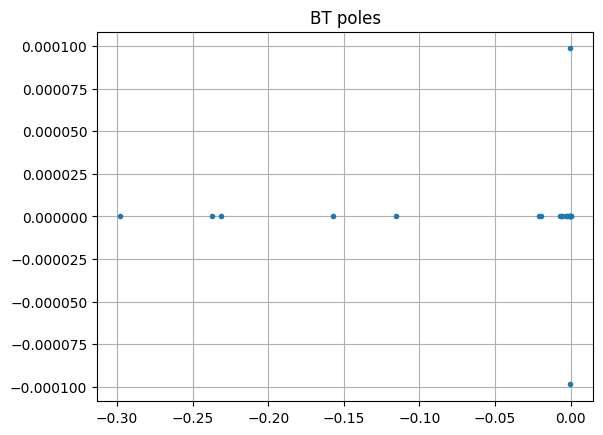

In [21]:
fig, ax = plt.subplots()
poles = rail_rom_bt.poles()
_ = ax.plot(poles.real, poles.imag, '.')
_ = ax.set_title('BT poles')

In [22]:
poles.real.max()

-1.841041389485496e-05

## FOM and BT Magnitude Plots

In [ ]:
w = (1e-6, 1e3)
_ = rail_fom.transfer_function.mag_plot(w)
_ = rail_rom_bt.transfer_function.mag_plot(w)

## BT Error System

In [27]:
rail_err_bt = rail_fom - rail_rom_bt

In [28]:
rail_err_bt

LTIModel(
    BlockDiagonalOperator(
        array([[NumpyMatrixOperator(<5177x5177 sparse, 35185 nnz>),
                ZeroOperator(NumpyVectorSpace(5177), NumpyVectorSpace(20))],
               [ZeroOperator(NumpyVectorSpace(20), NumpyVectorSpace(5177)),
                NumpyMatrixOperator(<20x20 dense>)]], dtype=object)),
    BlockColumnOperator(
        array([[NumpyMatrixOperator(<5177x7 sparse, 345 nnz>)], [NumpyMatrixOperator(<20x7 dense>)]], dtype=object)),
    BlockRowOperator(
        array([[NumpyMatrixOperator(<6x5177 sparse, 17 nnz>),
                LincombOperator((NumpyMatrixOperator(<6x20 dense>)), (-1.0))]],
              dtype=object)),
    D=LincombOperator(
          (ZeroOperator(NumpyVectorSpace(6), NumpyVectorSpace(7)),
           ZeroOperator(NumpyVectorSpace(6), NumpyVectorSpace(7))),
          (1.0, -1.0)),
    E=BlockDiagonalOperator(
          array([[NumpyMatrixOperator(<5177x5177 sparse, 35241 nnz>),
                  ZeroOperator(NumpyVectorSpace(5177),

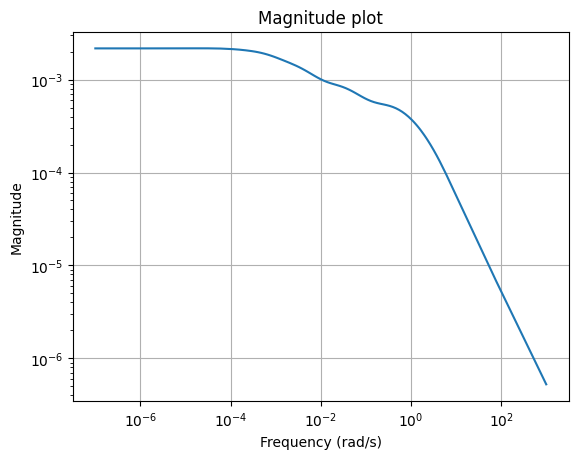

In [29]:
_ = rail_err_bt.transfer_function.mag_plot(w)

## $\mathcal{H}_2$ Relative Error

In [30]:
rail_err_bt.h2_norm() / rail_fom.h2_norm()

Accordion(children=(HTML(value='', layout=Layout(height='16em', width='100%')),), titles=('Log Output',))

0.0828376897447462

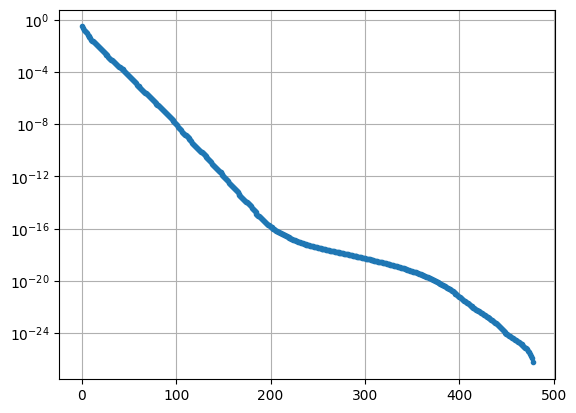

In [31]:
_ = plt.semilogy(rail_bt.error_bounds(), '.-')

## IRKA

In [35]:
from pymor.reductors.h2 import IRKAReductor

rail_irka = IRKAReductor(rail_fom)

In [36]:
rail_rom_irka = rail_irka.reduce(20, conv_crit='h2', tol=1e-3, num_prev=10)

Accordion(children=(HTML(value='', layout=Layout(height='16em', width='100%')),), titles=('Log Output',))

In [37]:
rail_rom_irka

LTIModel(
    NumpyMatrixOperator(<20x20 dense>),
    NumpyMatrixOperator(<20x7 dense>),
    NumpyMatrixOperator(<6x20 dense>),
    D=ZeroOperator(NumpyVectorSpace(6), NumpyVectorSpace(7)),
    E=NumpyMatrixOperator(<20x20 dense>),
    presets={},
    name='LTIModel_reduced')

## IRKA Convergence

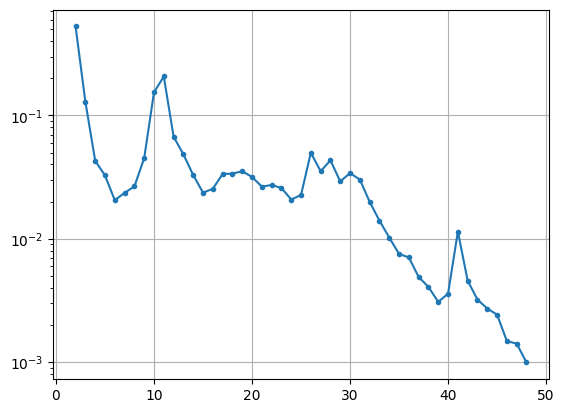

In [38]:
_ = plt.semilogy(rail_irka.conv_crit, '.-')

## IRKA Poles

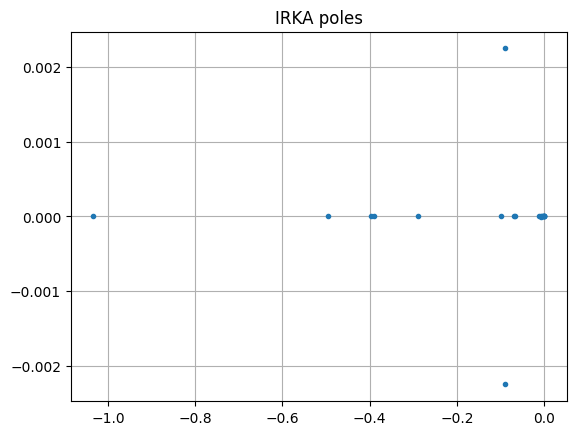

In [39]:
fig, ax = plt.subplots()
poles = rail_rom_irka.poles()
_ = ax.plot(poles.real, poles.imag, '.')
_ = ax.set_title('IRKA poles')


In [40]:
poles.real.max()

-2.8257407645113602e-05

## FOM and IRKA Magnitude Plots

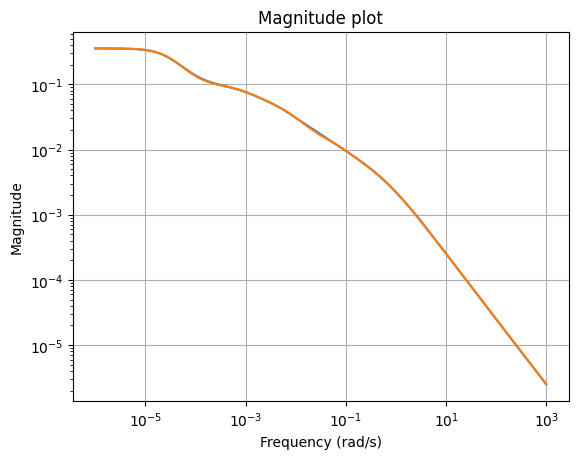

In [41]:
w = (1e-6, 1e3)
_ = rail_fom.transfer_function.mag_plot(w)
_ = rail_rom_irka.transfer_function.mag_plot(w)

## IRKA Error System

In [42]:
rail_err_irka = rail_fom - rail_rom_irka

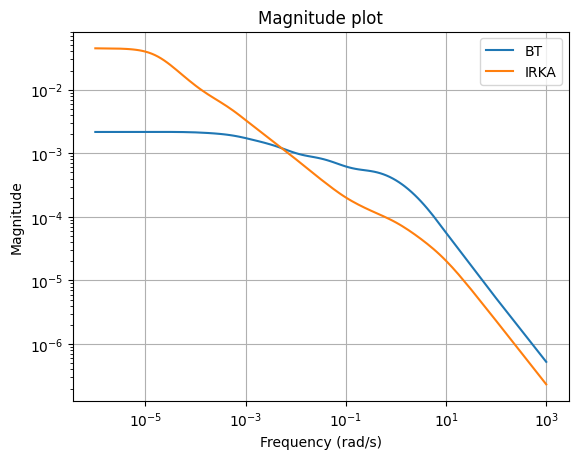

In [43]:
fig, ax = plt.subplots()
_ = rail_err_bt.transfer_function.mag_plot(w, ax=ax, label='BT')
_ = rail_err_irka.transfer_function.mag_plot(w, ax=ax, label='IRKA')
_ = ax.legend()

## $\mathcal{H}_2$ Relative Error

In [44]:
rail_err_irka.h2_norm() / rail_fom.h2_norm()

Accordion(children=(HTML(value='', layout=Layout(height='16em', width='100%')),), titles=('Log Output',))

0.044402875567679426

## Transfer Function

#### Heat equation over a semi-infinite rod from \[Beattie/Gugercin '12\].

$$
\begin{align*}
  H(s) & = e^{-\sqrt{s}} \\
  H'(s) & = -\frac{e^{-\sqrt{s}}}{2 \sqrt{s}}
\end{align*}
$$

In [47]:
from pymor.models.transfer_function import TransferFunction

def H(s):
    return np.array([[np.exp(-np.sqrt(s))]])

def dH(s):
    return np.array([[-np.exp(-np.sqrt(s)) / (2 * np.sqrt(s))]])

tf = TransferFunction(
    1,
    1,
    H,
    dH,
)

In [49]:
tf

TransferFunction(1, 1, <function H at 0x7f6e8826cca0>, dtf=<function dH at 0x7f6e8826e680>, presets={})

## Bode Plot

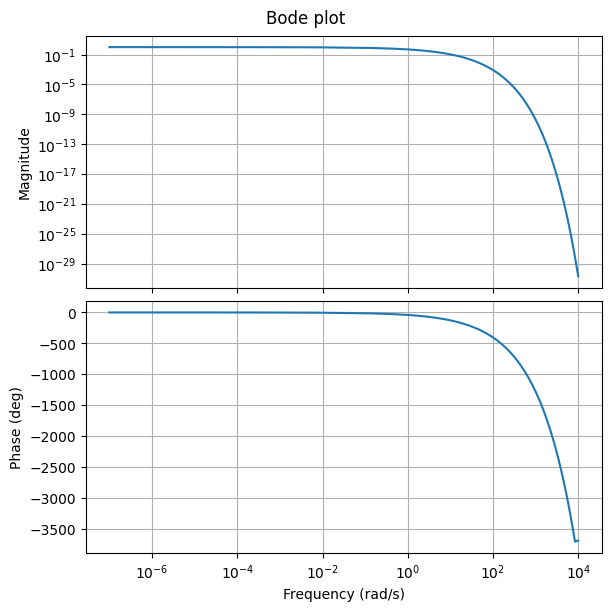

In [50]:
w_tf = (1e-7, 1e4)
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True, squeeze=False, constrained_layout=True)
_ = tf.bode_plot(w_tf, ax=ax)


## TF-IRKA

In [51]:
from pymor.reductors.h2 import TFIRKAReductor

tf_irka = TFIRKAReductor(tf)

In [52]:
tf_rom = tf_irka.reduce(20)

Accordion(children=(HTML(value='', layout=Layout(height='16em', width='100%')),), titles=('Log Output',))

In [54]:
tf_rom

LTIModel(
    NumpyMatrixOperator(<20x20 dense>),
    NumpyMatrixOperator(<20x1 dense>),
    NumpyMatrixOperator(<1x20 dense>),
    D=ZeroOperator(NumpyVectorSpace(1), NumpyVectorSpace(1)),
    E=NumpyMatrixOperator(<20x20 dense>),
    presets={})

## TF-IRKA Poles

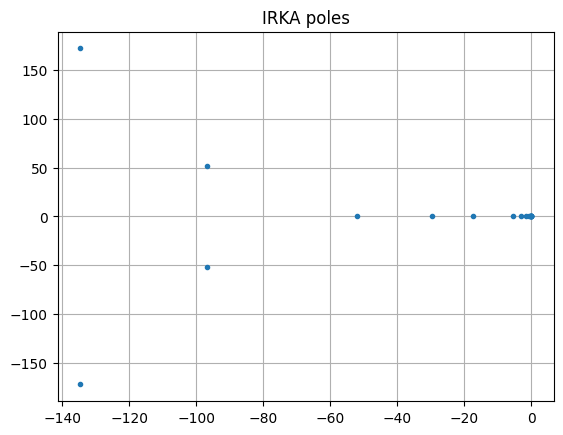

In [55]:
fig, ax = plt.subplots()
poles = tf_rom.poles()
_ = ax.plot(poles.real, poles.imag, '.')
_ = ax.set_title('IRKA poles')

In [56]:
poles.real.max()

-3.588117692129271e-05

## Bode Plots

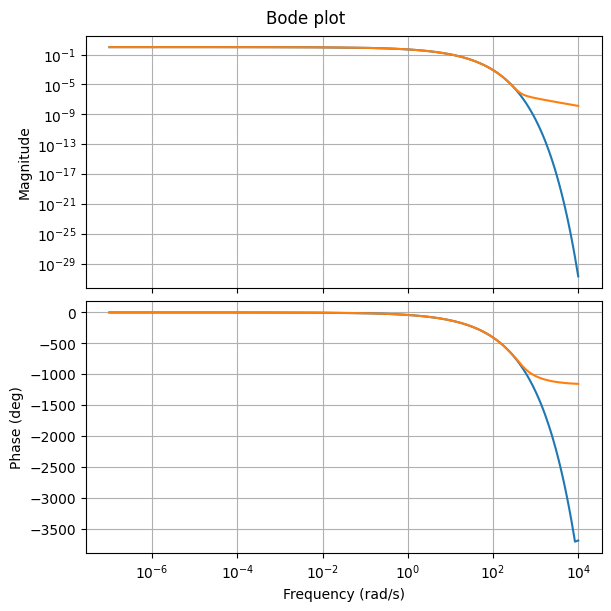

In [57]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True, squeeze=False, constrained_layout=True)
_ = tf.bode_plot(w_tf, ax=ax)
_ = tf_rom.transfer_function.bode_plot(w_tf, ax=ax)

## Error System

In [58]:
tf_err = tf - tf_rom

In [59]:
tf_err

TransferFunction(
    1,
    1,
    <function TransferFunction.__add__.<locals>.<lambda> at 0x7f6e75252dd0>,
    dtf=<function TransferFunction.__add__.<locals>.<lambda> at 0x7f6e75252d40>,
    presets={})

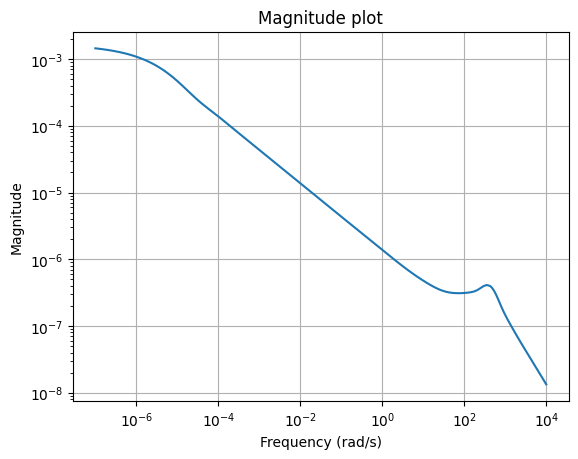

In [60]:
_ = tf_err.mag_plot(w_tf)

## AAA

In [61]:
from pymor.reductors.aaa import PAAAReductor

sampling_values = 1j * np.logspace(-4, 2, 100)
sampling_values = np.concatenate((sampling_values, -sampling_values))
sampling_values = [sampling_values]
aaa = PAAAReductor(sampling_values, tf)

In [62]:
aaa_rom = aaa.reduce(tol=1e-4)

Accordion(children=(HTML(value='', layout=Layout(height='16em', width='100%')),), titles=('Log Output',))

In [63]:
aaa_rom

TransferFunction(1, 1, <function make_bary_func.<locals>.bary_func at 0x7f6e75253ac0>, presets={})

## Bode Plots

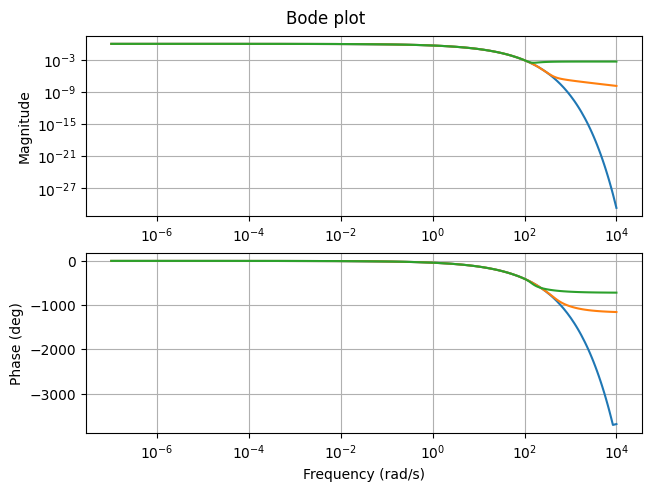

In [64]:
fig, ax = plt.subplots(2, 1, squeeze=False, constrained_layout=True)
_ = tf.bode_plot(w_tf, ax=ax)
_ = tf_rom.transfer_function.bode_plot(w_tf, ax=ax)
_ = aaa_rom.bode_plot(w_tf, ax=ax)

## Error System

In [65]:
aaa_err = tf - aaa_rom

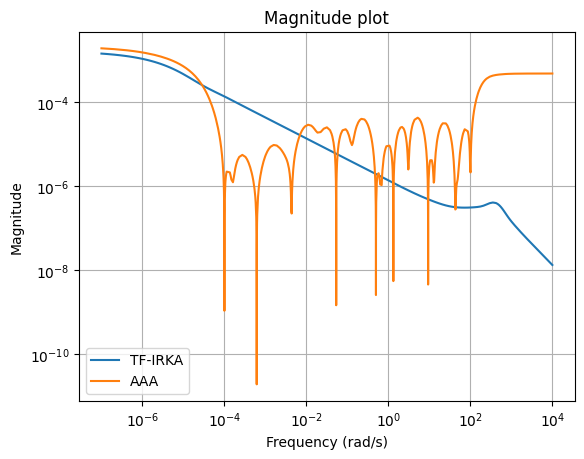

In [66]:
fig, ax = plt.subplots()
_ = tf_err.mag_plot(w_tf, ax=ax, label='TF-IRKA')
_ = aaa_err.mag_plot(w_tf, ax=ax, label='AAA')
_ = ax.legend()

## Parametric LTI Models

#### Cookie model (thermal block) example from [MOR Wiki](https://morwiki.mpi-magdeburg.mpg.de/morwiki/index.php/Thermal_Block).


In [67]:
import scipy.io as spio

mat = spio.loadmat('data/cookie/ABCE.mat')

In [68]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A0', 'A1', 'A2', 'A3', 'A4', 'B', 'C', 'E'])

In [69]:
A0 = mat['A0']
A1 = 0.2 * mat['A1'] + 0.4 * mat['A2'] + 0.6 * mat['A3'] + 0.8 * mat['A4']
B = mat['B']
C = mat['C']
E = mat['E']

In [70]:
A0

<7488x7488 sparse matrix of type '<class 'numpy.float64'>'
	with 45343 stored elements in Compressed Sparse Column format>

In [72]:
from pymor.operators.numpy import NumpyMatrixOperator

A0op = NumpyMatrixOperator(A0)
A1op = NumpyMatrixOperator(A1)
Bop = NumpyMatrixOperator(B)
Cop = NumpyMatrixOperator(C)
Eop = NumpyMatrixOperator(E)

In [73]:
A0op

NumpyMatrixOperator(<7488x7488 sparse, 45343 nnz>)

In [74]:
from pymor.parameters.functionals import ProjectionParameterFunctional

Aop = A0op + ProjectionParameterFunctional('p') * A1op

In [75]:
Aop

LincombOperator(
    (NumpyMatrixOperator(<7488x7488 sparse, 45343 nnz>), NumpyMatrixOperator(<7488x7488 sparse, 7075 nnz>)),
    (1.0, ProjectionParameterFunctional('p', index=0)))

In [76]:
cookie_fom = LTIModel(Aop, Bop, Cop, E=Eop)

In [77]:
cookie_fom

LTIModel(
    LincombOperator(
        (NumpyMatrixOperator(<7488x7488 sparse, 45343 nnz>), NumpyMatrixOperator(<7488x7488 sparse, 7075 nnz>)),
        (1.0, ProjectionParameterFunctional('p', index=0))),
    NumpyMatrixOperator(<7488x1 dense>),
    NumpyMatrixOperator(<4x7488 dense>),
    D=ZeroOperator(NumpyVectorSpace(4), NumpyVectorSpace(1)),
    E=NumpyMatrixOperator(<7488x7488 sparse, 51842 nnz>),
    presets={})

In [78]:
cookie_fom.parameters

Parameters({p: 1})

## Magnitude Plot

In [80]:
num_w = 10
num_p = 10
ws = np.logspace(-4, 4, num_w)
ps = np.logspace(-6, 2, num_p)
Hwp = np.empty((num_p, num_w))
for i in range(num_p):
    Hwp[i] = spla.norm(cookie_fom.transfer_function.freq_resp(ws, mu=ps[i]), axis=(1, 2))

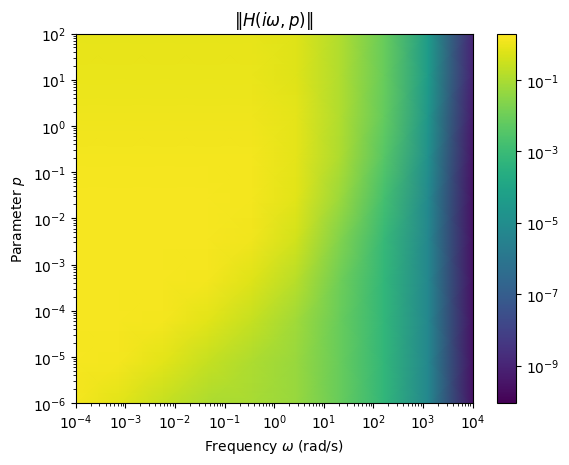

In [81]:
from matplotlib.colors import LogNorm

lognorm = LogNorm(vmin=9e-11, vmax=2)

fig, ax = plt.subplots()
out = ax.pcolormesh(ws, ps, Hwp, shading='gouraud', norm=lognorm)
ax.set(
    xscale='log',
    yscale='log',
    xlabel=r'Frequency $\omega$ (rad/s)',
    ylabel='Parameter $p$',
    title=r'$\Vert H(i \omega, p) \Vert$',
)
ax.grid(False)
_ = fig.colorbar(out)


## Interpolation

In [82]:
from pymor.algorithms.gram_schmidt import gram_schmidt
from pymor.reductors.interpolation import LTIBHIReductor

s_samples = np.logspace(-1, 1, 5)
s_samples = np.concatenate((1j * s_samples, -1j * s_samples))
p_samples = np.logspace(-3, -1, 5)
V = cookie_fom.A.source.empty()
W = cookie_fom.A.source.empty()
for p in p_samples:
    interp = LTIBHIReductor(cookie_fom, mu=p)
    interp.reduce(s_samples, np.ones((len(s_samples), 1)), np.ones((len(s_samples), 4)))
    V.append(interp.V)
    W.append(interp.W)

_ = gram_schmidt(V, copy=False)
_ = gram_schmidt(W, copy=False)


In [83]:
V

NumpyVectorArray(
    NumpyVectorSpace(7488),
    [[ 0.00000000e+00  2.51321276e-04  1.63665698e-04 ...  1.96197432e-02
       1.97658068e-02  1.97639887e-02]
     [ 0.00000000e+00  2.13203855e-05  1.38786844e-05 ...  5.15695013e-03
       5.25335472e-03  5.25263810e-03]
     [ 0.00000000e+00  8.44679122e-05  5.50135271e-05 ...  2.40281160e-04
       1.12582270e-04  1.13319923e-04]
     ...
     [ 0.00000000e+00 -1.28478866e-03 -8.37700698e-04 ...  2.09176586e-02
       3.06803407e-02  3.05572364e-02]
     [ 0.00000000e+00 -1.42259587e-04 -9.41225471e-05 ... -8.85064886e-03
      -2.69799749e-02 -2.63284179e-02]
     [ 0.00000000e+00 -1.04972734e-03 -6.84580888e-04 ... -6.39531952e-03
      -1.71934812e-02 -1.64296568e-02]],
    _len=50)

In [84]:
from pymor.reductors.basic import LTIPGReductor

pg = LTIPGReductor(cookie_fom, W, V)
cookie_rom = pg.reduce()

In [85]:
cookie_rom

LTIModel(
    LincombOperator(
        (NumpyMatrixOperator(<50x50 dense>), NumpyMatrixOperator(<50x50 dense>)),
        (1.0, ProjectionParameterFunctional('p', index=0))),
    NumpyMatrixOperator(<50x1 dense>),
    NumpyMatrixOperator(<4x50 dense>),
    D=ZeroOperator(NumpyVectorSpace(4), NumpyVectorSpace(1)),
    E=NumpyMatrixOperator(<50x50 dense>),
    presets={},
    name='LTIModel_reduced')

## Error System

In [86]:
cookie_err = cookie_fom - cookie_rom

In [87]:
Hwp_err = np.empty((num_p, num_w))
for i in range(num_p):
    Hwp_err[i] = spla.norm(cookie_err.transfer_function.freq_resp(ws, mu=ps[i]), axis=(1, 2))


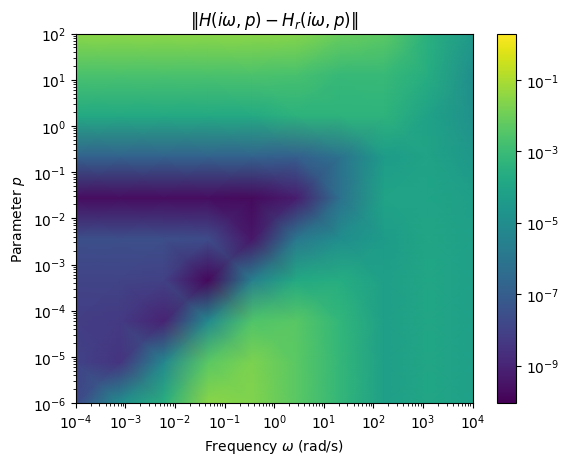

In [88]:
fig, ax = plt.subplots()
out = ax.pcolormesh(ws, ps, Hwp_err, shading='gouraud', norm=lognorm)
ax.set(
    xscale='log',
    yscale='log',
    xlabel=r'Frequency $\omega$ (rad/s)',
    ylabel='Parameter $p$',
    title=r'$\Vert H(i \omega, p) - H_r(i \omega, p) \Vert$',
)
ax.grid(False)
_ = fig.colorbar(out)


## ROM Poles

In [89]:
for p in ps:
    poles = cookie_rom.poles(mu=p)
    print(poles.real.max())

555.3371887479133
555.2271330303105
554.3759143224527
547.8378790091541
499.7906891473844
145.28465028424662
-1.0000002732252098
11.67287282510259
3047.786675440796
27972.946080636


## Galerkin Projection

In [90]:
from pymor.algorithms.pod import pod

VW = V.copy()
VW.append(W)
VW, svals = pod(VW)

Accordion(children=(HTML(value='', layout=Layout(height='16em', width='100%')),), titles=('Log Output',))

In [91]:
VW

NumpyVectorArray(
    NumpyVectorSpace(7488),
    [[ 3.22237279e-10  8.52602871e-07  5.57728873e-07 ...  1.43168634e-03
       1.43160978e-03  1.43161540e-03]
     [-5.17626121e-09 -3.40503944e-05 -2.22515985e-05 ... -2.50607799e-02
      -2.50575266e-02 -2.50659808e-02]
     [ 7.45776752e-09 -1.86504133e-04 -1.21433155e-04 ...  8.65879486e-03
       8.65458264e-03  8.66106782e-03]
     ...
     [ 3.97794142e-03  1.05886025e-05  9.67823432e-06 ... -9.71317215e-03
      -1.56219157e-02 -1.47339528e-02]
     [-3.07441204e-02 -3.07632453e-03 -1.99535583e-03 ...  1.60885547e-02
       2.08731556e-02  2.21109624e-02]
     [-3.60432746e-02 -2.43588198e-03 -1.56992251e-03 ... -7.65765424e-03
      -1.04962816e-02 -7.96201226e-03]],
    _len=99)

In [92]:
galerkin = LTIPGReductor(cookie_fom, VW, VW)
cookie_rom_g = galerkin.reduce()

## Error System 2

In [93]:
cookie_err2 = cookie_fom - cookie_rom_g

In [94]:
Hwp_err2 = np.empty((num_p, num_w))
for i in range(num_p):
    Hwp_err2[i] = spla.norm(cookie_err2.transfer_function.freq_resp(ws, mu=ps[i]), axis=(1, 2))


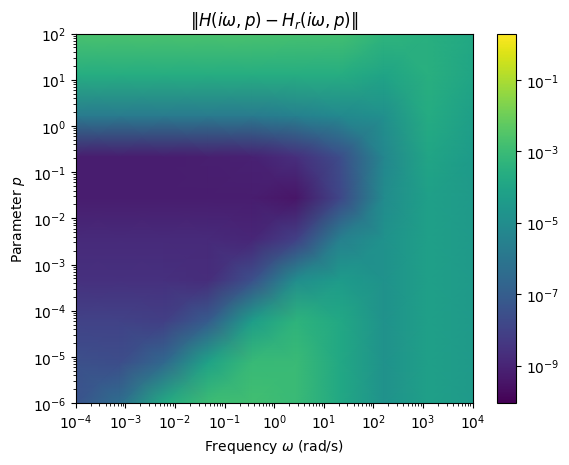

In [95]:
fig, ax = plt.subplots()
out = ax.pcolormesh(ws, ps, Hwp_err2, shading='gouraud', norm=lognorm)
ax.set(
    xscale='log',
    yscale='log',
    xlabel=r'Frequency $\omega$ (rad/s)',
    ylabel='Parameter $p$',
    title=r'$\Vert H(i \omega, p) - H_r(i \omega, p) \Vert$',
)
ax.grid(False)
_ = fig.colorbar(out)


## ROM Poles 2

In [96]:
for p in ps:
    poles = cookie_rom_g.poles(mu=p)
    print(poles.real.max())

-0.00011636209650564409
-0.0009009336272519853
-0.006974650579412651
-0.053943941251330146
-0.41347861337385156
-0.9999998827557518
-0.9999999999731152
-0.9999999999703275
-0.9999999999686026
-0.9999915826021304


## Concluding Remarks

### Further MOR Methods

- #### nonlinear systems
- #### DEIM
- #### second-order systems
- #### time-delay systems
- #### modal truncation
- #### data-driven methods (p-AAA, Loewner, neural network based ROMs, ...)


## Using pyMOR

- #### installation: https://github.com/pymor/pymor#readme
- #### documentation: https://docs.pymor.org
- #### GitHub issues: https://github.com/pymor/pymor/issues
- #### GitHub discussions: https://github.com/pymor/pymor/discussions
- #### pyMOR community meetings: https://github.com/pymor/pymor/discussions/categories/announcements
- #### pyMOR School: https://school.pymor.org


## Contributing to pyMOR

- #### developer documentation: https://docs.pymor.org/latest/developer_docs.html
- #### get attribution via `AUTHORS.md`
- #### become contributor with push access to feature branches
- #### become main developer with full control over the project
